In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Requirement already satisfied: openpyxl in c:\users\bhavy\appdata\roaming\python\python311\site-packages (3.1.2)

Requirement already satisfied: et-xmlfile in c:\users\bhavy\appdata\roaming\python\python311\site-packages (from openpyxl) (1.1.0)

0

In [3]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [5]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [7]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()
daily_revenue



,LodgingRevenue,OtherRevenue
date,,
2016-01-01,10591.35,2472.96
2016-01-02,16600.46,11398.50
2016-01-03,13701.23,7978.80
2016-01-04,2896.70,750.98
2016-01-05,13940.15,6580.39
...,...,...
2018-12-27,12226.74,3683.15
2018-12-28,13728.79,3512.40
2018-12-29,25279.16,7768.88


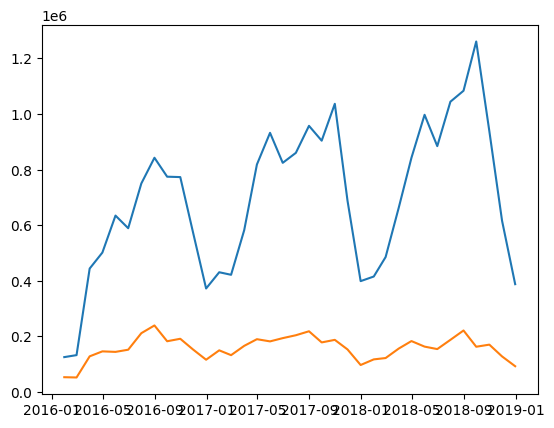

In [10]:
fig,ax=plt.subplots()
ax.plot(monthly_revenue)

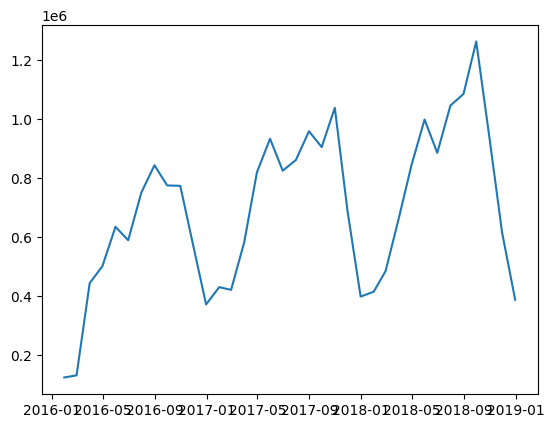

In [9]:
fig,ax=plt.subplots()
ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"])

##ax.plot(monthly_revenue.index,monthly_revenue['OtherRevenue'])

# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [ ]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()


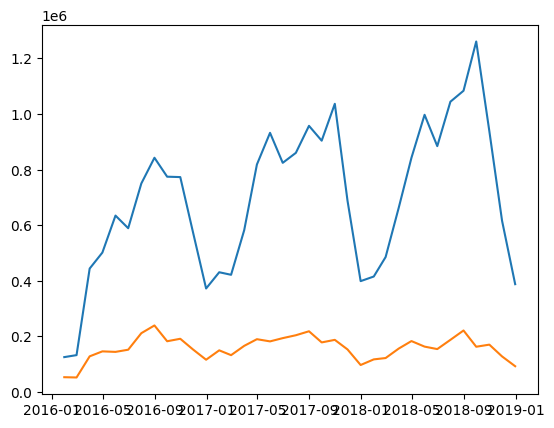

In [41]:
fig,ax=plt.subplots()
ax.plot(monthly_revenue.index,monthly_revenue['LodgingRevenue'])
ax.plot(monthly_revenue.index,monthly_revenue['OtherRevenue'])

<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

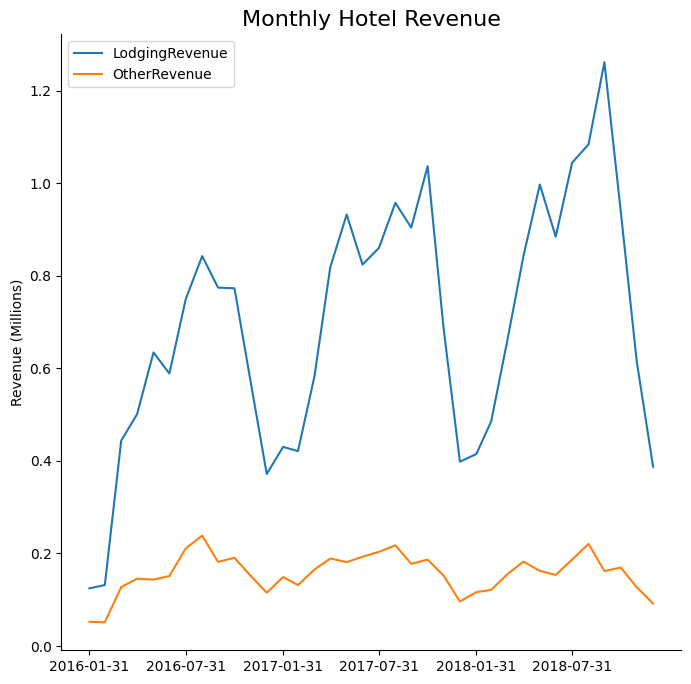

In [57]:
fig,ax=plt.subplots(figsize=(8,8))
##fig.suptitle('Monthly Hotel Revenue')
ax.plot(monthly_revenue.index,monthly_revenue['LodgingRevenue']/1000000,label='LodgingRevenue')
ax.plot(monthly_revenue.index,monthly_revenue['OtherRevenue']/1000000,label='OtherRevenue')
ax.set_title('Monthly Hotel Revenue',fontsize=16)
ax.set_ylabel('Revenue (Millions)')
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(monthly_revenue.index[::6])
plt.xticks

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [60]:
room_nights=hotels.groupby("date").agg({"RoomNights":"sum","BookingsCanceled":"sum"})
quarterly_bookings=room_nights.resample("Q").sum()

In [61]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


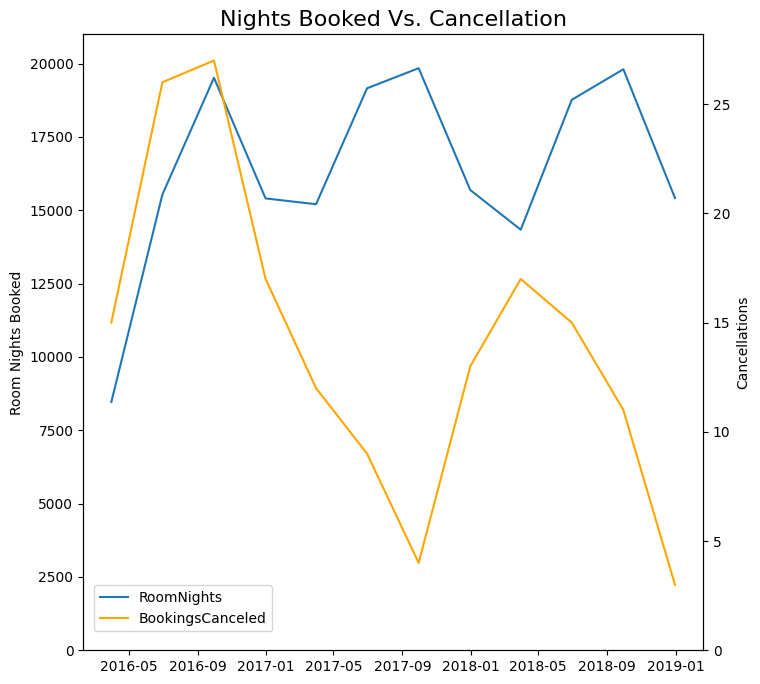

In [73]:
fig,ax=plt.subplots(figsize=(8,8))
##fig.suptitle('Monthly Hotel Revenue')
ax.plot(quarterly_bookings.index,quarterly_bookings['RoomNights'],label='RoomNights')
ax.set_title('Nights Booked Vs. Cancellation',fontsize=16)
ax.set_ylabel('Room Nights Booked')
ax.set_ylim(0,21000)

ax2=ax.twinx()
ax2.plot(quarterly_bookings.index,quarterly_bookings['BookingsCanceled'],label='BookingsCanceled',c='orange')
ax2.set_ylabel('Cancellations')
ax2.set_ylim(0)

fig.legend(bbox_to_anchor=(.37,.2))


# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [80]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

In [81]:
countries=(hotels
           .groupby("Nationality")
           .agg({"RoomNights":"sum","LodgingRevenue":"sum"})
            .sort_values("RoomNights",ascending=False)
            .iloc[:10]
)
countries

,RoomNights,LodgingRevenue
Nationality,,
FRA,31018,3809315.59
DEU,26334,3113382.55
PRT,24334,2715008.72
GBR,20822,2693123.61
ESP,10877,1475909.33
ITA,8046,1032729.72
BEL,7758,1047661.98
NLD,6619,904460.78
BRA,6535,787928.01


Text(0.5, 1.0, 'Room Nights Booked By Country')

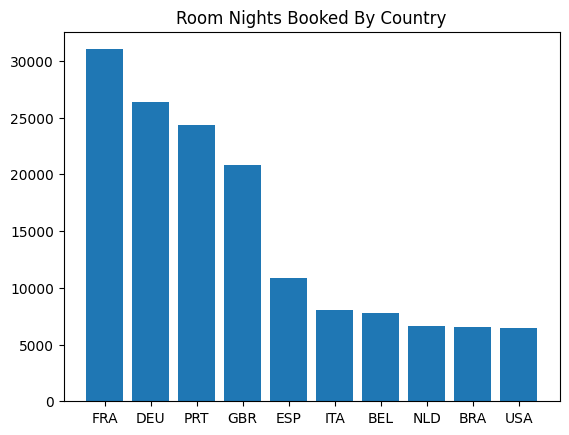

In [95]:
fig,ax=plt.subplots()
ax.bar(countries.index,countries.RoomNights)
ax.set_title("Room Nights Booked By Country")

Text(0.5, 1.0, 'Lodging Revenue By Countries')

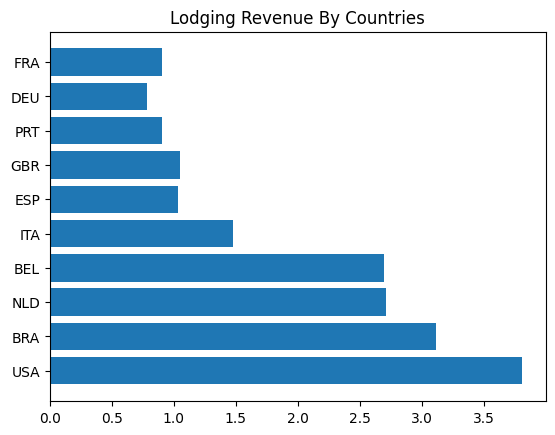

In [93]:
fig,ax=plt.subplots()
ax.barh(countries.index[::-1]
        ,countries.LodgingRevenue/1000000)
ax.set_title("Lodging Revenue By Countries")

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [101]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset=(hotels.loc[hotels['Nationality'].isin(countries)]
                    .groupby("Nationality")
                    .agg({"LodgingRevenue":"sum","OtherRevenue":"sum"})
                    .sort_values("LodgingRevenue",ascending=False))

country_subset             

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


[Text(0, 0, 'FRA'),
 Text(1, 0, 'DEU'),
 Text(2, 0, 'PRT'),
 Text(3, 0, 'GBR'),
 Text(4, 0, 'ESP')]

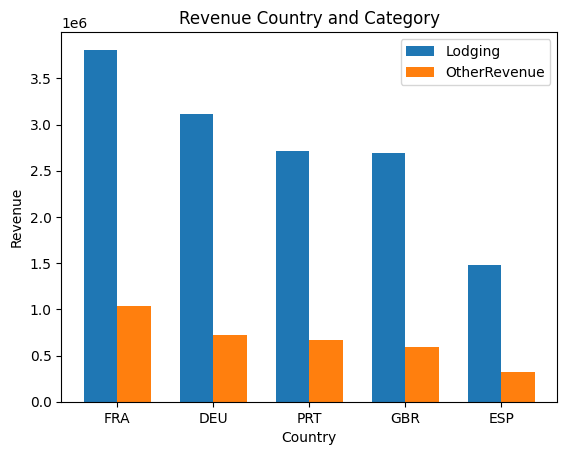

In [113]:
fig,ax=plt.subplots()
width=.35
x=np.arange(5)

ax.bar(
    x-width/2,
    country_subset['LodgingRevenue'],
    width=width,
    label='Lodging'
)
ax.bar(
    x+width/2,
    country_subset['OtherRevenue'],
    width=width,
    label='OtherRevenue'
)

ax.set_title('Revenue Country and Category')
ax.set_xlabel('Country')
ax.set_ylabel('Revenue')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(country_subset.index)


In [120]:
country_subset_pcts=country_subset=country_subset.apply(lambda x:x*100/sum(x),axis=1)

Text(0.5, 1.0, 'Revenue Country and Category')

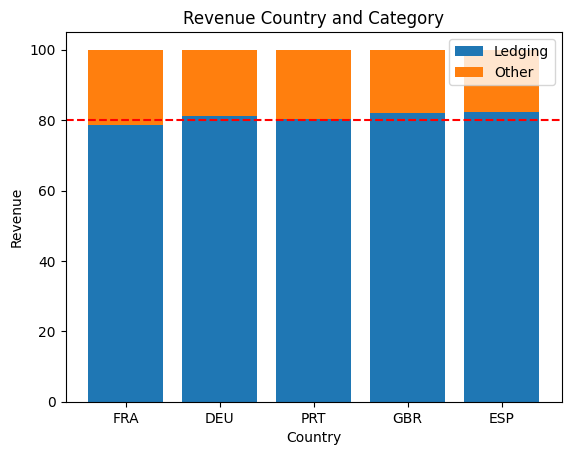

In [127]:
fig,ax=plt.subplots()

ax.bar(country_subset_pcts.index,
       country_subset_pcts.LodgingRevenue,
       label='Ledging')

ax.bar(country_subset_pcts.index,
       country_subset_pcts.OtherRevenue,
       label='Other',
       bottom= country_subset_pcts.LodgingRevenue)

ax.axhline(80,0,1,c="red",ls="--")

ax.legend()
ax.set_ylabel('Revenue')
ax.set_xlabel('Country')
ax.set_title('Revenue Country and Category')

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [128]:
hotels

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018-12-31
83586,83587,IRL,47.0,0,109,327.1,277.5,0,0,1,...,0,0,0,1,0,0,0,0,0,2018-12-31
83587,83588,IRL,53.0,0,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018-12-31
83588,83589,IRL,85.0,0,109,981.3,9.0,0,0,1,...,0,0,0,0,1,0,0,0,0,2018-12-31


In [141]:
country_rev = (hotels.groupby('Nationality')
               .agg({"LodgingRevenue":"sum"})
               .sort_values("LodgingRevenue",ascending=False))

pie_data=(pd.concat([country_rev.iloc[:5],
                     pd.DataFrame({"LodgingRevenue":country_rev.iloc[5:,0].sum()},
                                   index=["OTH"])]                                   
                                   )
        ).iloc[::-1]
pie_data

,LodgingRevenue
OTH,11170126.66
ESP,1475909.33
GBR,2693123.61
PRT,2715008.72
DEU,3113382.55
FRA,3809315.59


Text(0.5, 1.0, 'Percent of Revenue by Country')

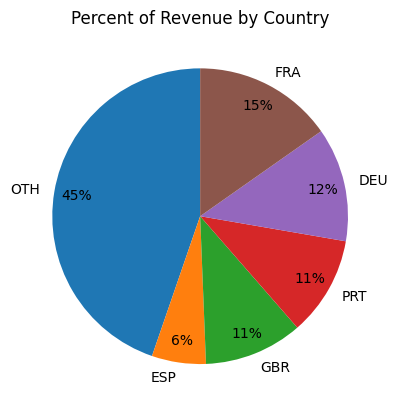

In [143]:
fig,ax=plt.subplots()

ax.pie(
    x=pie_data.LodgingRevenue,
    startangle=90,
    labels=pie_data.index,
    autopct='%.0f%%',
    pctdistance=.85
)
ax.set_title("Percent of Revenue by Country")

Text(0.5, 1.0, 'Percent of Revenue by Country')

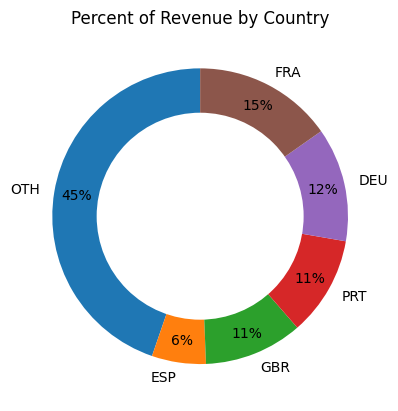

In [147]:
fig,ax=plt.subplots()

ax.pie(
    x=pie_data.LodgingRevenue,
    startangle=90,
    labels=pie_data.index,
    autopct='%.0f%%',
    pctdistance=.85
)
donut_hole=plt.Circle((0,0),0.70,fc="white")
fig=plt.gcf()
fig.gca().add_artist(donut_hole)
ax.set_title("Percent of Revenue by Country")

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [15]:
hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])
hotels.head()


,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [ ]:
fig,ax=plt.subplots()

ax.scatter(
    hotels['avg_revenue'],
    hotels
)